In [84]:
import math
import numpy  as np
import pylab as pl
%matplotlib inline


In [85]:
def dividir(A, inicio, fin):
    pivote=A[inicio]
    izquierda=inicio
    derecha=fin
    
    while izquierda<derecha:
        while A[derecha]>pivote:
            derecha=derecha-1
        while (izquierda<derecha) and (A[izquierda]<=pivote):
            izquierda=izquierda+1
            
        if izquierda<derecha:
            aux=A[izquierda]
            A[izquierda]=A[derecha]
            A[derecha]=aux
        
    aux=A[derecha]
    A[derecha]=A[inicio]
    A[inicio]=aux
        
    return derecha
            
        
    

In [86]:
def quickSort(A, inicio, fin):

    if inicio<fin:
        pivote=dividir(A, inicio, fin)
        quickSort(A, inicio, pivote-1)
        quickSort(A, pivote+1, fin)

In [87]:
A=[3,1,5,2,7,9,4,1]
quickSort(A, 0, len(A)-1)
print A

[1, 1, 2, 3, 4, 5, 7, 9]


<h1> Invariante </h1>

In [88]:
def invariante(numMin, numMax, pibote):
    bandera = True;
    
    if(len(numMin)>=1):        
        if(pibote[0] <= max(numMin)):
            bandera = False;
            
    if(len(numMax)>=1):        
        if(pibote[0] > min(numMax)):
            bandera = False;
        
    print numMin, " - ", pibote, " - ", numMax
        
    return bandera

In [89]:
def inv_quickSort(A):

    if len(A) < 2:
        return A

    izq, der, pibote = inv_dividir(A)

    return inv_quickSort(izq) + pibote + inv_quickSort(der)

def inv_dividir(A):

    pibote = A[:1]

    izq =[]
    
    der = []

    for i in xrange(1, len(A)):
        
        if(A[i] < pibote[0]):
        
            izq.append(A[i])
        else:
            
            der.append(A[i])
            
    print invariante(izq, der, pibote)
    return izq,der, pibote

In [90]:
A = [6,1,8,9,2,34,10,0]
A = inv_quickSort(A)
print A

[1, 2, 0]  -  [6]  -  [8, 9, 34, 10]
True
[0]  -  [1]  -  [2]
True
[]  -  [8]  -  [9, 34, 10]
True
[]  -  [9]  -  [34, 10]
True
[10]  -  [34]  -  []
True
[0, 1, 2, 6, 8, 9, 10, 34]


In [91]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
        
def acct_quickSort(A, inicio, fin, acct):

    if inicio<fin:
        acct.count
        pivote=acct_dividir(A, inicio, fin, acct);acct.count
        quickSort(A, inicio, pivote-1);acct.count
        quickSort(A, pivote+1, fin);acct.count
        
def acct_dividir(A, inicio, fin, acct):
    pivote=A[inicio];acct.count
    izquierda=inicio;acct.count
    derecha=fin;acct.count
    
    while izquierda<derecha:
        acct.count
        while A[derecha]>pivote:
            acct.count
            derecha=derecha-1;acct.count
        while (izquierda<derecha) and (A[izquierda]<=pivote):
            acct.count
            izquierda=izquierda+1;acct.count
            
        if izquierda<derecha:
            acct.count
            aux=A[izquierda];acct.count
            A[izquierda]=A[derecha];acct.count
            A[derecha]=aux;acct.count
        
    aux=A[derecha];acct.count
    A[derecha]=A[inicio];acct.count
    A[inicio]=aux;acct.count
        
    return derecha;acct.count
            
        


In [92]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_quickSort(l, 0, len(l)-1, acct)
        results.append(acct.steps*1000000)
    return results

In [93]:
import time

def time_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        acct_quickSort(l, 0, len(l)-1, acct)
        toc = time.clock()#get final time
        results.append((toc-tic)*1000000)
    return results


In [94]:
import random as ran

def operation_analisis(n):
    results=[]
    for i in range(n):
        if(i==0):
            a=0
        else:
            
            a = i*np.log2(i)
        results.append(a)
    
    return results

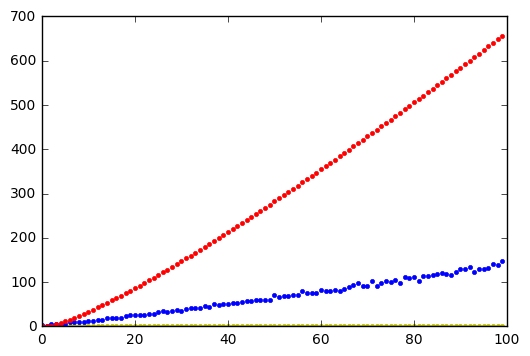

In [95]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.', color='y')
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.', color='b')
y = np.array(operation_analisis(100))
pl.plot(x, y, 'k.', color='r')
